# Answer 1 - Importing data from Bloomberg

In [1]:
#from xbbg import blp
#import pandas as pd
#blp.create_connection()

In [2]:
#EQNR_P=blp.bdh('EQNR NO Equity','PX_LAST','20070101','20171231')
#GE_P=blp.bdh('GE US Equity','PX_LAST','20070101','20171231')
#DBS_P=blp.bdh('DBS SP Equity','PX_LAST','20070101','20171231')
#EQNR_P.head()

In [3]:
#EQNR_V=blp.bdh('EQNR NO Equity','VOLUME','20070101','20171231')
#GE_V=blp.bdh('GE US Equity','VOLUME','20070101','20171231')
#DBS_V=blp.bdh('DBS SP Equity','VOLUME','20070101','20171231')
#DBS_V.head()

In [4]:
#tickers=['EQNR NO Equity','GE US Equity','DBS SP Equity']
#i=['PX_LAST','VOLUME']
#df= blp.bdh(tickers,i,'2007-01-01','2017-12-31')
#df.columns=df.columns.get_level_values(0)
#df.index.name='Date'
#df.head()
#df.columns=['EQ_P','EQ_V','GE_P','GE_V','DBS_P','DBS_V']
#df=df.dropna()
#df.head()

In [5]:
#df.to_csv('Python A1 Final_Data.csv')

# Answer 2 - Returns, Standard Deviations and Correlations

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import datetime
import statsmodels.api as sm
from itertools import product

In [44]:
raw_data = pd.read_csv("Python A1 Final_Data_Group 6.csv")
data = raw_data.set_index('Date')
data.columns=data.columns.get_level_values(0) 
eq_data = data.dropna()
eq_data.index = pd.to_datetime(eq_data.index.astype(str), format = '%Y-%m-%d')
eq_data.head()

,EQ_P,EQ_V,GE_P,GE_V,DBS_P,DBS_V
Date,,,,,,
2007-01-03,87.440,16310191.0,23.9146,43225000.0,11.7326,2721635.0
2007-01-04,84.226,17300051.0,23.7761,31305800.0,11.6293,4095213.0
2007-01-05,83.289,21904081.0,23.6564,27027200.0,11.8360,6526818.0
2007-01-08,84.628,15407693.0,23.6501,23716200.0,11.8360,6865573.0
2007-01-09,81.950,32401199.0,23.6501,24606300.0,11.6809,6748401.0


In [45]:
EQ_P = eq_data [['EQ_P']]
GE_P = eq_data [['GE_P']]
DBS_P = eq_data [['DBS_P']]

EQ_V = eq_data [['EQ_V']]
GE_V = eq_data [['GE_V']]
DBS_V = eq_data [['DBS_V']]

#calculates the returns for each stock in a new column
eq_data['EQ_R'] = EQ_P.pct_change() 
eq_data['GE_R'] = GE_P.pct_change() 
eq_data['DBS_R'] = DBS_P.pct_change()

eq_data = eq_data.dropna()

EQ_R = eq_data[['EQ_R']]
GE_R = eq_data[['GE_R']]
DB_R = eq_data[['DBS_R']]

#creates a new data frame with the three stocks
St_prices = eq_data [['EQ_P','GE_P','DBS_P']]

eq_data.head()

,EQ_P,EQ_V,GE_P,GE_V,DBS_P,DBS_V,EQ_R,GE_R,DBS_R
Date,,,,,,,,,
2007-01-04,84.226,17300051.0,23.7761,31305800.0,11.6293,4095213.0,-0.036757,-0.005791,-0.008805
2007-01-05,83.289,21904081.0,23.6564,27027200.0,11.8360,6526818.0,-0.011125,-0.005034,0.017774
2007-01-08,84.628,15407693.0,23.6501,23716200.0,11.8360,6865573.0,0.016077,-0.000266,0.000000
2007-01-09,81.950,32401199.0,23.6501,24606300.0,11.6809,6748401.0,-0.031644,0.000000,-0.013104
2007-01-10,82.083,24376664.0,23.6564,23996900.0,11.3191,6021007.0,0.001623,0.000266,-0.030974


In [46]:
dates = pd.date_range('2007-01-01', '2017-12-31')
data_for_monthly = pd.DataFrame(St_prices, index = dates) 
monthly = data_for_monthly.resample('M').last() #creates a data frame with prices at the end of the month

print(monthly.pct_change().mean())
print(monthly.pct_change().std())
print(monthly.pct_change().corr())

EQ_P     0.006554
GE_P     0.000884
DBS_P    0.007966
dtype: float64
EQ_P     0.063075
GE_P     0.082126
DBS_P    0.073283
dtype: float64
           EQ_P      GE_P     DBS_P
EQ_P   1.000000  0.221538  0.362961
GE_P   0.221538  1.000000  0.421027
DBS_P  0.362961  0.421027  1.000000


# Answer 3 - Simple Moving Averages

In [59]:
SMA1 = 42
SMA2 = 252
sym = 'DBS_P'
Mov_av = pd.DataFrame(St_prices[sym])
Mov_av.head()

,DBS_P
Date,
2007-01-04,11.6293
2007-01-05,11.8360
2007-01-08,11.8360
2007-01-09,11.6809
2007-01-10,11.3191


In [60]:
Mov_av['SMA1']=St_prices[sym].rolling(window=SMA1).mean() 
Mov_av['SMA2']=St_prices[sym].rolling(window=SMA2).mean() 
Mov_av.tail()

,DBS_P,SMA1,SMA2
Date,,,
2017-12-21,22.1348,21.638252,18.239913
2017-12-22,22.2881,21.698790,18.265314
2017-12-27,22.4323,21.756321,18.290732
2017-12-28,22.4504,21.811064,18.316846
2017-12-29,22.4053,21.857648,18.343858


In [61]:
Mov_av['Position']=np.where(Mov_av['SMA1']>Mov_av['SMA2'],1,-1) #creates a new column 'Position'; 1 means buy, -1 means sell

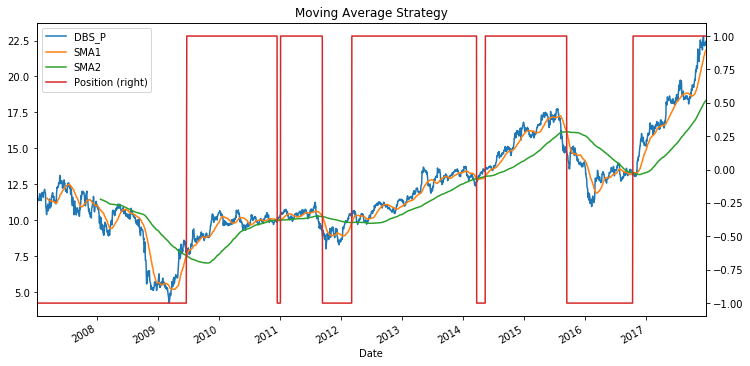

In [62]:
Mov_av.plot(figsize= (12,6), secondary_y = 'Position', title = 'Moving Average Strategy')

In [63]:
Mov_av['Returns'] = Mov_av[sym].pct_change()
Mov_av['Strategy']=Mov_av['Returns']*(Mov_av['Position'].shift(1)) #daily strategy return is equal to returns * previous day's position
(1+Mov_av[['Returns','Strategy']]).prod() #calculates cumulative returns
compare_sma=(1+Mov_av[['Returns','Strategy']]).cumprod()
compare_sma.head()

,Returns,Strategy
Date,,
2007-01-04,NaN,NaN
2007-01-05,1.017774,0.982226
2007-01-08,1.017774,0.982226
2007-01-09,1.004437,0.995097
2007-01-10,0.973326,1.025919


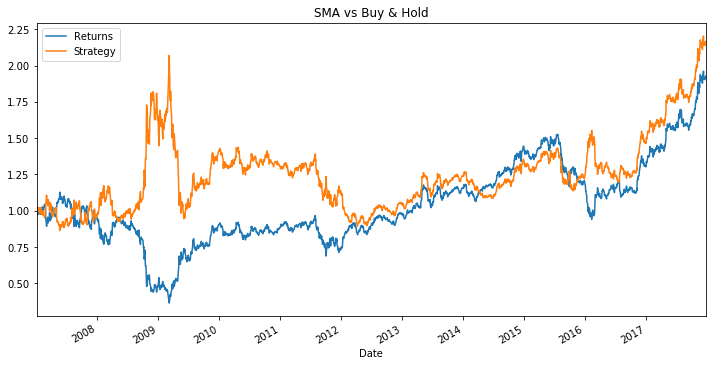

In [64]:
Mov_av=data.dropna()
compare_sma.plot(figsize=(12,6), title = 'SMA vs Buy & Hold')

In [65]:
sma1=range(20,61,4)
sma2=range(180,281,10) 
results = pd.DataFrame()

In [66]:
for SMA1, SMA2 in product(sma1,sma2):
    mva = pd.DataFrame(raw_data[sym])
    mva.dropna(inplace=True)
    mva['Returns']= mva[sym].pct_change()
    mva['SMA1'] = mva[sym].rolling(SMA1).mean()
    mva['SMA2'] = mva[sym].rolling(SMA2).mean()
    mva = mva.dropna()
    mva['Position'] = np.where(mva['SMA1'] > mva['SMA2'], 1, -1)
    mva['Strategy'] = mva['Position'].shift(1) * mva['Returns']
    mva = mva.dropna()
    perf = (1+mva[['Returns', 'Strategy']]).prod() #performance equals to cumulative return products
    
    #the statements below record the results
    results = results.append(pd.DataFrame(
    {'SMA1': SMA1, 'SMA2': SMA2,
    'MARKET': perf['Returns'],
    'STRATEGY': perf['Strategy'],
    'OUT': perf['Strategy'] - perf['Returns']},
    index=[0]), ignore_index=True)
    
results.head()

,SMA1,SMA2,MARKET,STRATEGY,OUT
0,20,180,1.949830,1.825473,-0.124357
1,20,190,1.880191,1.561766,-0.318425
2,20,200,1.914378,1.589320,-0.325057
3,20,210,2.107286,1.819152,-0.288135
4,20,220,2.173141,2.018993,-0.154148


In [69]:
results.sort_values('OUT',ascending=False).tail() #sort by performance, print the best five

,SMA1,SMA2,MARKET,STRATEGY,OUT
19,24,260,2.400705,1.527387,-0.873318
37,32,220,2.173141,1.281991,-0.891150
30,28,260,2.400705,1.506134,-0.894571
109,56,280,2.425840,1.502035,-0.923805
120,60,280,2.425840,1.430708,-0.995132


In [68]:
eq_data.head()

,EQ_P,EQ_V,GE_P,GE_V,DBS_P,DBS_V,EQ_R,GE_R,DBS_R
Date,,,,,,,,,
2007-01-04,84.226,17300051.0,23.7761,31305800.0,11.6293,4095213.0,-0.036757,-0.005791,-0.008805
2007-01-05,83.289,21904081.0,23.6564,27027200.0,11.8360,6526818.0,-0.011125,-0.005034,0.017774
2007-01-08,84.628,15407693.0,23.6501,23716200.0,11.8360,6865573.0,0.016077,-0.000266,0.000000
2007-01-09,81.950,32401199.0,23.6501,24606300.0,11.6809,6748401.0,-0.031644,0.000000,-0.013104
2007-01-10,82.083,24376664.0,23.6564,23996900.0,11.3191,6021007.0,0.001623,0.000266,-0.030974


# Answer 3 - Bollinger Bands

In [153]:
sym2= 'EQ_P'
bb_data = pd.DataFrame(data[sym2])
days_for_bb = 20
results = pd.DataFrame()
bb_data.head()

,EQ_P
Date,
2007-01-03,87.440
2007-01-04,84.226
2007-01-05,83.289
2007-01-08,84.628
2007-01-09,81.950


In [154]:
bb_data.dropna(inplace=True)
bb_data['Returns']= bb_data[sym2].pct_change()
bb_data['BMA'] = bb_data[sym2].rolling(days_for_bb).mean()
bb_data['BStd'] = bb_data[sym2].rolling(days_for_bb).std()
bb_data ['Upper Band'] = bb_data ['BMA'] + (bb_data ['BStd']*2)
bb_data ['Lower Band'] = bb_data ['BMA'] - (bb_data ['BStd']*2)
bb_data = bb_data.dropna()

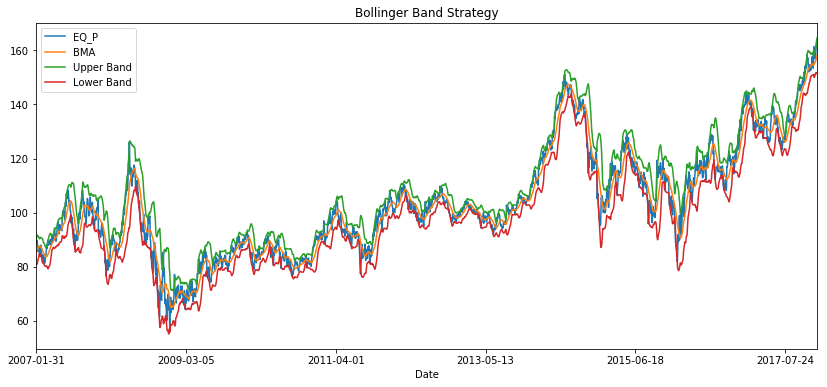

In [155]:
bb_data[[sym2, 'BMA', 'Upper Band', 'Lower Band']].plot(figsize = (14,6), title = 'Bollinger Band Strategy')

In [156]:
bb_data['Position'] = None
for row in range(len(bb_data)):
    if (bb_data[sym2].iloc[row]>bb_data['Upper Band'].iloc[row]) and (bb_data[sym2].iloc[row-1]<bb_data['Upper Band'].iloc[row-1]):
        bb_data['Position'].iloc[row]=-1
    if (bb_data[sym2].iloc[row]<bb_data['Lower Band'].iloc[row]) and (bb_data[sym2].iloc[row-1]>bb_data['Lower Band'].iloc[row-1]):
        bb_data['Position'].iloc[row]=1
bb_data['Position'].fillna(method='ffill',inplace=True)
bb_data.head()

C:\Users\Shariq\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,EQ_P,Returns,BMA,BStd,Upper Band,Lower Band,Position
Date,,,,,,,
2007-01-31,89.180,0.007558,85.53150,2.342380,90.216259,80.846741,NaN
2007-02-01,89.180,0.000000,85.61850,2.446973,90.512447,80.724553,NaN
2007-02-02,89.314,0.001503,85.87290,2.556613,90.986127,80.759673,NaN
2007-02-05,89.716,0.004501,86.19425,2.617921,91.430093,80.958407,NaN
2007-02-06,88.913,-0.008950,86.40850,2.658028,91.724556,81.092444,NaN


In [157]:
bb_data['Strategy'] = (bb_data['Position'].shift(1) * bb_data['Returns'])
bb_data = bb_data.dropna()
perf = (1+bb_data[['Returns', 'Strategy']]).prod() #performance equals to cumulative return products
    
perf

Returns     1.916885
Strategy    0.344448
dtype: float64

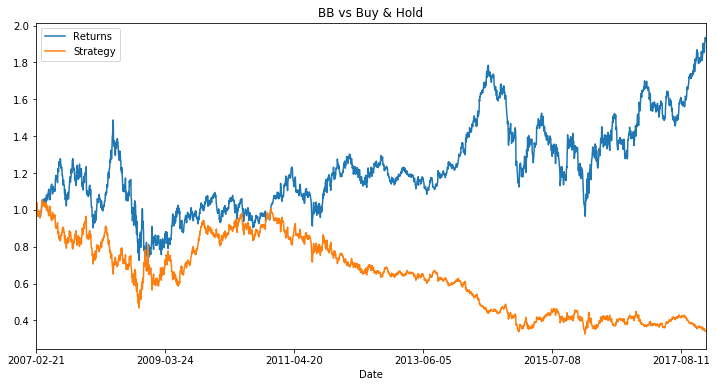

In [158]:
compare_bb=(1+bb_data[['Returns','Strategy']]).cumprod()
compare_bb.plot(figsize = (12,6), title = 'BB vs Buy & Hold')

In [159]:
days = range(10,101,10)
results = pd.DataFrame()

In [160]:
for d in days:
    bb_data2 = pd.DataFrame(raw_data[sym2])
    bb_data2.head()
    bb_data2.dropna(inplace=True)
    bb_data2['Returns']=bb_data2[sym2].pct_change()
    bb_data2['BMA'] = bb_data2[sym2].rolling(d).mean()
    bb_data2['BStd'] = bb_data2[sym2].rolling(d).std()
    bb_data2 ['Upper Band'] = bb_data2 ['BMA'] + (bb_data2 ['BStd']*2)
    bb_data2 ['Lower Band'] = bb_data2 ['BMA'] - (bb_data2 ['BStd']*2)
    bb_data2 = bb_data2.dropna()
    bb_data2['Position'] = None
    for row in range(len(bb_data2)):
        if (bb_data2[sym2].iloc[row]>bb_data2['Upper Band'].iloc[row]) and (bb_data2[sym2].iloc[row-1]<bb_data2['Upper Band'].iloc[row-1]):
            bb_data2['Position'].iloc[row]=-1
        if (bb_data2[sym2].iloc[row]<bb_data2['Lower Band'].iloc[row]) and (bb_data2[sym2].iloc[row-1]>bb_data2['Lower Band'].iloc[row-1]):
            bb_data2['Position'].iloc[row]=1    
    bb_data2['Position'].fillna(method='ffill',inplace=True)
    bb_data2['Strategy'] = (bb_data2['Position'].shift(1) * bb_data2['Returns'])
    bb_data2 = bb_data2.dropna()
    perf = (1+bb_data2[['Returns', 'Strategy']]).prod() #performance equals to cumulative return products
    results = results.append(pd.DataFrame( {'MARKET' : perf['Returns'], 'STRATEGY': perf['Strategy'], 'OUT': perf['Strategy']- perf['Returns'], 'DAYS': d}, index =['Date']), ignore_index = True)

In [161]:
results

,MARKET,STRATEGY,OUT,DAYS
0,1.898896,0.992948,-0.905948,10
1,1.916885,0.344448,-1.572437,20
2,1.985907,0.544240,-1.441668,30
3,1.697565,0.590112,-1.107452,40
4,1.733424,0.657412,-1.076012,50
5,1.733424,1.250868,-0.482555,60
6,1.773963,0.715755,-1.058208,70
7,1.750927,1.608007,-0.142920,80
8,1.717864,2.082087,0.364224,90
9,1.634778,3.041045,1.406267,100


In [162]:
results.sort_values('OUT',ascending=False)

,MARKET,STRATEGY,OUT,DAYS
9,1.634778,3.041045,1.406267,100
8,1.717864,2.082087,0.364224,90
7,1.750927,1.608007,-0.142920,80
5,1.733424,1.250868,-0.482555,60
0,1.898896,0.992948,-0.905948,10
6,1.773963,0.715755,-1.058208,70
4,1.733424,0.657412,-1.076012,50
3,1.697565,0.590112,-1.107452,40
2,1.985907,0.544240,-1.441668,30
1,1.916885,0.344448,-1.572437,20


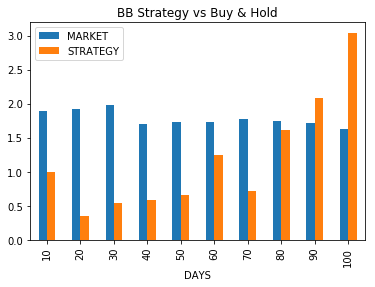

In [207]:
results[['MARKET', 'STRATEGY', 'DAYS']].plot(x = 'DAYS', kind = 'bar', title = 'BB Strategy vs Buy & Hold')

# Answer 4 - Equal Weighted Portfolio

In [164]:
eq_data['EP'] = (eq_data['EQ_R'] + eq_data ['GE_R'] + eq_data ['DBS_R'])/3

EP = eq_data [['EP']]

EP.mean()

EP    0.000282
dtype: float64

In [165]:
monthly.head()

,EQ_P,GE_P,DBS_P
2007-01-31,89.180,22.7053,11.3708
2007-02-28,83.824,22.1601,11.0090
2007-03-31,88.645,22.4458,11.0607
2007-04-30,90.386,23.3979,11.1282
2007-05-31,92.178,23.9502,12.5928


In [166]:
monthly['EQ_R'] = monthly[['EQ_P']].pct_change() 
monthly['GE_R'] = monthly[['GE_P']].pct_change() 
monthly['DBS_R'] = monthly[['DBS_P']].pct_change()

In [167]:
monthly = monthly.dropna()

In [168]:
monthly['EP'] = (monthly['EQ_R'] + monthly ['GE_R'] + monthly ['DBS_R'])/3

In [169]:
monthly.head()

,EQ_P,GE_P,DBS_P,EQ_R,GE_R,DBS_R,EP
2007-02-28,83.824,22.1601,11.0090,-0.060058,-0.024012,-0.031818,-0.038630
2007-03-31,88.645,22.4458,11.0607,0.057513,0.012893,0.004696,0.025034
2007-04-30,90.386,23.3979,11.1282,0.019640,0.042418,0.006103,0.022720
2007-05-31,92.178,23.9502,12.5928,0.019826,0.023605,0.131612,0.058347
2007-06-30,103.771,24.4747,12.0132,0.125768,0.021900,-0.046026,0.033880


In [170]:
monthly[['EP']].mean()

EP    0.005135
dtype: float64

In [171]:
monthly[['EP']].std()

EP    0.054581
dtype: float64

# Answer 5 - Alphas and Coefficients

In [172]:
FF3 = pd.read_csv('https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_daily_CSV.zip', skiprows=range(3), index_col=0)
FF5 = pd.read_csv('http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_5_Factors_2x3_daily_CSV.zip', skiprows = range(3), index_col = 0)

In [173]:
FF3 = FF3.loc['19260701':'20190628']
FF3.index=pd.to_datetime(FF3.index.astype(str))
FF5.index=pd.to_datetime(FF5.index.astype(str))

In [174]:
start_date = '2007-01-01'
end_date = '2017-12-31'
FF3F = FF3[start_date:end_date]
FF5F = FF5[start_date:end_date]

In [175]:
FF3F = FF3F/100
FF5F = FF5F/100

In [176]:
merged3F = pd.concat([eq_data['EP'],FF3F], axis = 1)
merged5F = pd.concat([eq_data['EP'],FF5F], axis = 1)

In [177]:
merged3F = merged3F.dropna()
merged5F = merged5F.dropna()

In [178]:
merged3F['ER'] = merged3F['EP'] - merged3F['RF']
merged5F['ER'] = merged5F['EP'] - merged5F['RF']

In [179]:
merged3F.head()

,EP,Mkt-RF,SMB,HML,RF,ER
2007-01-04,-0.017118,0.0016,0.0024,-0.0051,0.00022,-0.017338
2007-01-05,0.000538,-0.0073,-0.0091,-0.0033,0.00022,0.000318
2007-01-08,0.005270,0.0024,-0.0007,0.0008,0.00022,0.005050
2007-01-09,-0.014916,0.0000,0.0028,-0.0020,0.00022,-0.015136
2007-01-10,-0.009695,0.0023,-0.0008,-0.0017,0.00022,-0.009915


In [180]:
merged3F.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2626 entries, 2007-01-04 to 2017-12-29
Data columns (total 6 columns):
EP        2626 non-null float64
Mkt-RF    2626 non-null float64
SMB       2626 non-null float64
HML       2626 non-null float64
RF        2626 non-null float64
ER        2626 non-null float64
dtypes: float64(6)
memory usage: 143.6 KB


In [181]:
x = merged3F['Mkt-RF']                 
x1= sm.add_constant(x)                  
y = merged3F['ER']
CAPM_model= sm.OLS(y,x1).fit()
print(CAPM_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     ER   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     1727.
Date:                Sun, 08 Sep 2019   Prob (F-statistic):          1.90e-290
Time:                        23:20:04   Log-Likelihood:                 8285.8
No. Observations:                2626   AIC:                        -1.657e+04
Df Residuals:                    2624   BIC:                        -1.656e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.248e-05      0.000      0.261      0.7

C:\Users\Shariq\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [182]:
a11= merged3F[['Mkt-RF','SMB','HML']]
a11=sm.add_constant(a11)
b11= merged3F['ER']
FF3_model=sm.OLS(b11,a11).fit()
print(FF3_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     ER   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     600.7
Date:                Sun, 08 Sep 2019   Prob (F-statistic):          3.59e-297
Time:                        23:20:04   Log-Likelihood:                 8308.7
No. Observations:                2626   AIC:                        -1.661e+04
Df Residuals:                    2622   BIC:                        -1.659e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.958e-05      0.000      0.398      0.6

In [183]:
a = merged5F[['Mkt-RF','SMB','HML','RMW','CMA']]                 
a1= sm.add_constant(a)                  
b = merged5F['ER']
FF5_model= sm.OLS(b,a1).fit()
print(FF5_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     ER   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     364.2
Date:                Sun, 08 Sep 2019   Prob (F-statistic):          5.89e-297
Time:                        23:20:05   Log-Likelihood:                 8314.7
No. Observations:                2626   AIC:                        -1.662e+04
Df Residuals:                    2620   BIC:                        -1.658e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.588      0.5

# Answer 6 - Amihud Illiquidity  Measures

In [184]:
eq_data['EQ_DV'] = eq_data['EQ_P']*eq_data['EQ_V']
eq_data['GE_DV'] = eq_data['GE_P']*eq_data['GE_V']
eq_data['DBS_DV'] = eq_data['DBS_P']*eq_data['DBS_V']

In [185]:
eq_data.tail()

,EQ_P,EQ_V,GE_P,GE_V,DBS_P,DBS_V,EQ_R,GE_R,DBS_R,EP,EQ_DV,GE_DV,DBS_DV
Date,,,,,,,,,,,,,
2017-12-21,161.830,2288401.0,16.1857,67877696.0,22.1348,2745000.0,0.022267,0.001150,-0.001218,0.007400,3.703319e+08,1.098648e+09,6.076003e+07
2017-12-22,162.293,2277323.0,16.2134,46370351.0,22.2881,2286200.0,0.002861,0.001711,0.006926,0.003833,3.695936e+08,7.518210e+08,5.095505e+07
2017-12-27,164.055,1753487.0,16.2134,60126681.0,22.4323,2437700.0,0.010857,0.000000,0.006470,0.005776,2.876683e+08,9.748579e+08,5.468322e+07
2017-12-28,163.499,1055824.0,16.1948,60934882.0,22.4504,1811300.0,-0.003389,-0.001147,0.000807,-0.001243,1.726262e+08,9.868282e+08,4.066441e+07
2017-12-29,162.479,1382372.0,16.2787,76149513.0,22.4053,4495200.0,-0.006239,0.005181,-0.002009,-0.001022,2.246064e+08,1.239615e+09,1.007163e+08


In [186]:
output = pd.DataFrame(columns=[['date','Illiq']])

In [187]:
stocks = ('EQ','GE','DBS')

In [188]:
i=0
for stock in range (0,3):
    for year in range(2008,2010):
        for month in range(1,13):
            df = eq_data.loc[(eq_data.index.year==year) & (eq_data.index.month==month)]
            illiq = abs(df[stocks[stock]+'_R'])/(df[stocks[stock]+'_DV'])
            Illiq=illiq.mean()
            output.loc[i]=[str(year)+ str(month), Illiq]
            i = i+1

In [189]:
output.head()

,date,Illiq
0,20081,1.579210e-11
1,20082,1.629895e-11
2,20083,1.151929e-11
3,20084,1.071914e-11
4,20085,1.163377e-11


In [190]:
EQ_I = output.iloc[0:24,:]
GE_I = output.iloc[24:48,:]
DBS_I = output.iloc[48:72,:]

In [191]:
EQ_I.columns = ('Date', 'EQ_Illiq')
GE_I.columns = ('Date','GE_Illiq')
DBS_I.columns = ('Date','DBS_Illiq')

In [192]:
EQ_I = EQ_I.set_index('Date')
GE_I = GE_I.set_index('Date')
DBS_I = DBS_I.set_index('Date')

In [193]:
A_Illiq = pd.concat([EQ_I,GE_I,DBS_I], axis = 1, ignore_index=True)

In [194]:
A_Illiq.columns = ['Eq_Illiq', 'GE_Illiq', 'DBS_Illiq']

In [195]:
A_Illiq.head()

,Eq_Illiq,GE_Illiq,DBS_Illiq
Date,,,
20081,1.579210e-11,1.141586e-11,2.147448e-10
20082,1.629895e-11,1.121433e-11,2.111228e-10
20083,1.151929e-11,1.380470e-11,2.149794e-10
20084,1.071914e-11,9.853646e-12,1.594457e-10
20085,1.163377e-11,7.248444e-12,1.160762e-10


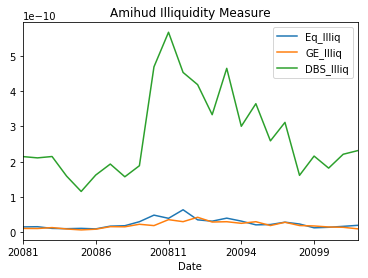

In [196]:
A_Illiq.plot(title = 'Amihud Illiquidity Measure')

# Answer 7 -  Sharpe Ratios

In [197]:
eq_data.head()

,EQ_P,EQ_V,GE_P,GE_V,DBS_P,DBS_V,EQ_R,GE_R,DBS_R,EP,EQ_DV,GE_DV,DBS_DV
Date,,,,,,,,,,,,,
2007-01-04,84.226,17300051.0,23.7761,31305800.0,11.6293,4095213.0,-0.036757,-0.005791,-0.008805,-0.017118,1.457114e+09,7.443298e+08,4.762446e+07
2007-01-05,83.289,21904081.0,23.6564,27027200.0,11.8360,6526818.0,-0.011125,-0.005034,0.017774,0.000538,1.824369e+09,6.393663e+08,7.725142e+07
2007-01-08,84.628,15407693.0,23.6501,23716200.0,11.8360,6865573.0,0.016077,-0.000266,0.000000,0.005270,1.303922e+09,5.608905e+08,8.126092e+07
2007-01-09,81.950,32401199.0,23.6501,24606300.0,11.6809,6748401.0,-0.031644,0.000000,-0.013104,-0.014916,2.655278e+09,5.819415e+08,7.882740e+07
2007-01-10,82.083,24376664.0,23.6564,23996900.0,11.3191,6021007.0,0.001623,0.000266,-0.030974,-0.009695,2.000910e+09,5.676803e+08,6.815238e+07


In [198]:
SR_GE = (eq_data['GE_R'].mean() - merged3F['RF'].mean())/eq_data['GE_R'].std()
SR_EQ = (eq_data['EQ_R'].mean() - merged3F['RF'].mean())/eq_data['EQ_R'].std()
SR_DBS = (eq_data['DBS_R'].mean() - merged3F['RF'].mean())/eq_data['DBS_R'].std()
SR_EP = (eq_data['EP'].mean() - merged3F['RF'].mean())/eq_data['EP'].std()

In [199]:
SRList = [SR_GE,SR_EQ, SR_DBS,SR_EP]
StockList = ['GE', 'EQ', 'DBS', 'EP']

In [200]:
SRList = pd.DataFrame(SRList)

In [201]:
StockList = pd.DataFrame(StockList)

In [202]:
SRS = pd.concat([StockList, SRList], axis = 1, ignore_index=True)

In [203]:
SRS = SRS.set_index(0)

In [204]:
SRS.columns = ['Sharpe Ratios']

In [205]:
SRS.index.name = 'Stocks'

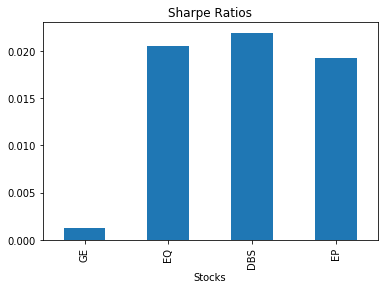

In [206]:
SRS.plot(kind = 'bar', title = 'Sharpe Ratios', legend=False)